In [41]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [42]:
batch_size = 64
img_height = 48
img_width = 48

In [43]:
train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [45]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [46]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


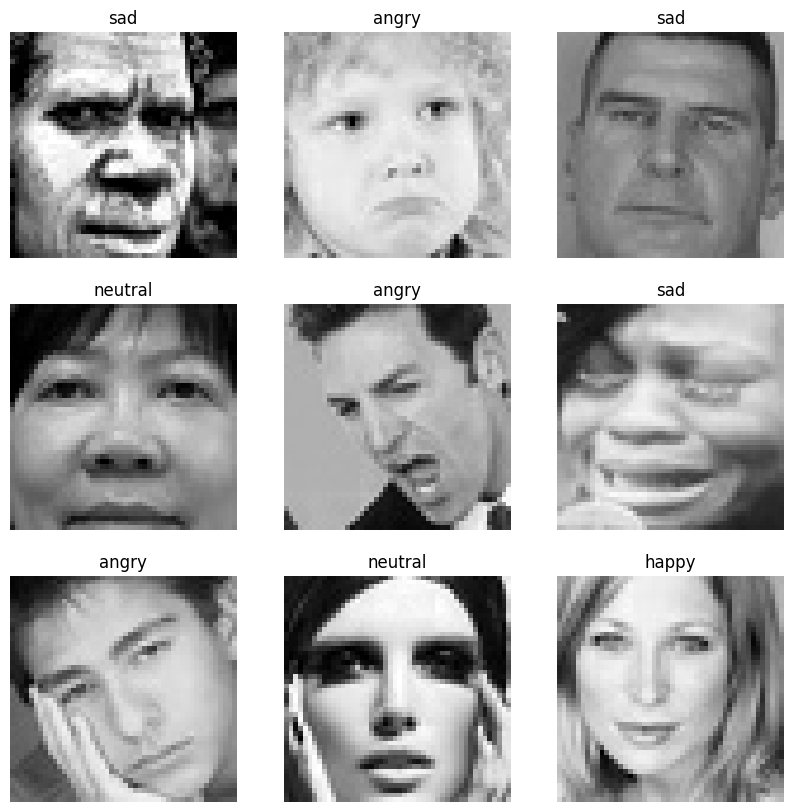

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [49]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.06666667 0.86274517


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [51]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [52]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [53]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
359/359 [==============================] - 79s 220ms/step - loss: 2.7907 - accuracy: 0.2469 - val_loss: 1.8818 - val_accuracy: 0.2453
Epoch 2/30
359/359 [==============================] - 81s 225ms/step - loss: 1.8621 - accuracy: 0.2528 - val_loss: 1.8509 - val_accuracy: 0.2453
Epoch 3/30
359/359 [==============================] - 81s 226ms/step - loss: 1.8394 - accuracy: 0.2528 - val_loss: 1.8359 - val_accuracy: 0.2453
Epoch 4/30
359/359 [==============================] - 81s 226ms/step - loss: 1.8275 - accuracy: 0.2529 - val_loss: 1.8276 - val_accuracy: 0.2453
Epoch 5/30
359/359 [==============================] - 84s 233ms/step - loss: 1.8205 - accuracy: 0.2528 - val_loss: 1.8225 - val_accuracy: 0.2453
Epoch 6/30
359/359 [==============================] - 88s 245ms/step - loss: 1.8162 - accuracy: 0.2528 - val_loss: 1.8194 - val_accuracy: 0.2453
Epoch 7/30
359/359 [==============================] - 84s 235ms/step - loss: 1.8138 - accuracy: 0.2528 - val_loss: 1.8171 - val_ac

KeyboardInterrupt: 

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
predictions = model.predict(test_ds)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

In [ ]:
print(test_loss,test_acc)

In [ ]:
model.save('nn_model_all.h5')

In [ ]:
model.save('my_model.keras')

In [ ]:
import cv2

In [ ]:
image = cv2.imread('example4.jpg')

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [ ]:
resized_image = cv2.resize(gray_image, (48, 48))
resized_image = np.expand_dims(resized_image, axis=0)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(48, 48, 3)))

normalized_image = model.predict(resized_image)

In [ ]:
from keras.models import load_model
loaded_nn_model = load_model('nn_model_all.h5')

In [ ]:
y_predict=loaded_nn_model.predict(normalized_image)

In [ ]:
print(y_predict)

In [ ]:
res = np.argmax(y_predict[0])

In [ ]:
print('predicted Label for that image is: {}'.format(class_names[res]))

In [ ]:
# import cv2

# # Load the face cascade
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Create a video capture object
# cap = cv2.VideoCapture(0)

# # Loop until the user presses the Esc key
# while True:

#     # Capture a frame from the webcam
#     ret, frame = cap.read()
#     frame = cv2.flip(frame,1)
#     # Convert the frame to grayscale
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the grayscale frame
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#     # Draw a bounding box around each face
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     # Display the frame
#     cv2.imshow('frame', frame)

#     # Wait for a key press
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# # Release the video capture object
# cap.release()

# # Close all windows
# cv2.destroyAllWindows()